<a href="https://colab.research.google.com/github/RafsanJany-44/ARC/blob/master/tnj_on_going_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mount Google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
def Search_Some(dataset,some):
  d={}
  for col in list(dataset.columns):
    rows = []
    flage = 0
    for row in range(dataset.shape[0]):
      if str(dataset[col][row]) == some:
        rows.append(row)
        flage = 1
    if flage ==1:
      d[col] = rows
  
  return d


def divide_dataset(dataset,numOrper,random_state = 0):

  rows,cols = dataset.shape

  if random_state == 0:
    if type(numOrper) == int:
      return dataset.iloc[:numOrper,:]
    else:
      return dataset.iloc[:int(rows*(numOrper)),:]
  else:
    import random
    if type(numOrper) == int:
      l_r = random.sample(range(0, rows), numOrper)
    else:
      l_r = random.sample(range(0, rows), int(rows*(numOrper)))
    return dataset.iloc[l_r,:]



def subject_train_test_split(X,Y,test_size):
    rows=X.shape[0]
    train_size=1-test_size
    train=int(rows*train_size)
    
    f=X['Subject'][train]
    count1=0
    index1=train    
    while X['Subject'][index1]==f:
        index1-=1
        count1+=1
    index2=train+1
    count2=0
    while X['Subject'][index2]==f:
        index2+=1
        count2+=1

    if count1>count2:
        train+=count2
    else:
        train-=count1

    test=rows-train
    print('Train Subject start and end:',X['Subject'][0],'To',X['Subject'][train])
    print('Test Subject start and end:',X['Subject'][train+1],'To',X['Subject'][rows-1])
    print('Train Percentage:',train/rows)
    X_train= X[:train+2]
    X_test= X[train+1:]
    Y_train = Y[:train+2]
    Y_test = Y[train+1:]
    return X_train,X_test,Y_train,Y_test

  

def train_test_split(X,Y,test_size,feature):

    f=Y.value_counts()
    rows=X.shape[0]
    talika=[]
    count=0
    for i in f:
        talika.append(i)
    train_size=1-test_size
    start=0

    switch=False

    key=0
    for i in talika :
        i-=1
        train=start+int(i*train_size)
        f= X[feature][train]
        count1=0
        index1=train

        while X[feature][index1]==f:
            if count1>=train:
                break
            index1-=1
            count1+=1
        index2=train+1
        count2=0
        while X[feature][index2]==f:
            if count2>=i-train:
                break
            index2+=1
            count2+=1
        if count1>count2:
            train+=count2
        else:
            train-=count1
        end=start+i
        if switch == False:
            X_train= X[start:train+2]
            X_test= X[train+1:end]
            Y_train = Y[start:train+2]
            Y_test = Y[train+1:end]
            switch=True

        else:


            X_train=pd.concat([X_train, X[start:train+2]], ignore_index=True)
            X_test=pd.concat([X_test, X[train+1:end]], ignore_index=True)
            Y_train=pd.concat([Y_train, Y[start:train+2]], ignore_index=True)
            Y_test=pd.concat([Y_test, Y[train+1:end]], ignore_index=True)

        start=start+i+1
        key+=1
    print('Train Percentage:',X_train.shape[0]/rows)
    return X_train,X_test,Y_train,Y_test

#numpy and pandas

In [4]:
import numpy as np
import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/Tanjila_mam/DS-Healthcare_version_2.xlsx')
target="Type"

In [ ]:
df.shape

(888817, 13)

In [ ]:
df[target].value_counts()

ischemic      581219
healthy       267360
arrhythmic     40238
Name: Type, dtype: int64

#Data Spliting


##Divide dataset into small part
<font color = 'coral'>the parameters `(dataset, number of row in int/percent in float, random(1) or not(0))`</font>

In [ ]:
dataset = divide_dataset(df,300000,1)
dataset[target].value_counts() 

ischemic      195909
healthy        90453
arrhythmic     13638
Name: Type, dtype: int64

##Use the full dataset

In [ ]:
dataset = df

In [ ]:
dataset.shape

(888817, 13)

#Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

classes = np.array(sorted(list(set(dataset[target]))))
print("Before encoding: ",classes)
encoder=LabelEncoder()
dataset[target]=encoder.fit_transform(dataset[target])
print("After encoding:",set(dataset[target]))

Before encoding:  ['arrhythmic' 'healthy' 'ischemic']
After encoding: {0, 1, 2}


In [ ]:
#from label encoder the actual values were changed 
classes_dict={
    0: "arrhythmic",
    1: "healthy",
    2: "ischemic"
}

#Dataset spliting to X and y

And removing unwanted columns

In [ ]:
X = dataset.loc[:, dataset.columns!=target]     #removing target column (classes)
y = dataset[target]

list_of_feat = X.columns

In [ ]:
X.head()

,Subject,Cycle,Time,RR-I,HR,R-H,P-H,QRS,PRQ,QT,QTC,ST
0,E1,1,1.072,0.932,64.377682,3.305,3.810,0.088,0.160,0.384,0.397762,0.296
1,E1,2,2.004,1.004,59.760956,3.285,3.810,0.100,0.160,0.640,0.638724,0.540
2,E1,3,3.008,0.996,60.240964,3.340,3.830,0.128,0.148,0.628,0.629260,0.500
3,E1,4,4.004,1.016,59.055118,3.325,3.810,0.108,0.172,0.388,0.384933,0.280
4,E1,5,5.020,0.972,61.728395,3.290,3.765,0.100,0.160,0.372,0.377320,0.272


#Dataset spliting for training and testing

##Using sklearn.model_selection 

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
y_train.value_counts()

2    156540
1     72476
0     10984
Name: Type, dtype: int64

##Using Custom Function
Here dataset will be divided according to <font color='red'>Subject</font>

In [ ]:
X_train,X_test,y_train,y_test = subject_train_test_split(X,y,test_size=0.2)

Train Subject start and end: E1 To F20
Test Subject start and end: F21 To M28
Train Percentage: 0.8027152945994507


In [ ]:
y_train.value_counts()

2    581219
1    132250
Name: Type, dtype: int64

#Removing Unnecessary Columns

In [ ]:
X_train = X_train.loc[:, X.columns!="Subject"]              #removing 'Subjec' column
X_train = X_train.loc[:, X.columns!="Cycle"]                #removing 'Cycle' column
X_train = X_train.loc[:, X.columns!="Time"]                 #removing 'Time' column if you want, un-comment it

X_test = X_test.loc[:, X.columns!="Subject"]              #removing 'Subjec' column
X_test = X_test.loc[:, X.columns!="Cycle"]                #removing 'Cycle' column
X_test = X_test.loc[:, X.columns!="Time"]                 #removing 'Time' column if you want, un-comment it



#Dataset Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X =  scaler.transform(X)

ValueError: ignored

#Dataset Balancing

##Over Sampling

In [ ]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_train, y_train= smote.fit_resample(X_train, y_train)

#new_dataset=pd.concat([pd.DataFrame(X_temp), pd.DataFrame(y_temp)], axis=1)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Under Sampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_train, y_train = rus.fit_resample(X_train, y_train)

In [ ]:
y_train.value_counts()

0    156540
1    156540
2    156540
Name: Type, dtype: int64

#Training 

##RandomForest

###With Default parameters

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier
rf_default = RandomForestClassifier(n_jobs = -1)
rf_default.fit(X_train, y_train)
y_pred=rf_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))


[[  7935     10     19]
 [   262  52524    486]
 [  1312    690 114526]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      7964
           1       0.99      0.99      0.99     53272
           2       1.00      0.98      0.99    116528

    accuracy                           0.98    177764
   macro avg       0.94      0.99      0.96    177764
weighted avg       0.99      0.98      0.98    177764

Accurecy:  0.9843669134357913
CPU times: user 34.2 s, sys: 63.5 ms, total: 34.3 s
Wall time: 9.49 s


###Tunning <i>n_estimators</i>

  7%|▋         | 2/30 [00:00<00:03,  7.32it/s]

1/30 round completed......................... Accurecy: 0.9562
2/30 round completed......................... Accurecy: 0.9476


 10%|█         | 3/30 [00:00<00:05,  5.22it/s]

3/30 round completed......................... Accurecy: 0.9716


 13%|█▎        | 4/30 [00:00<00:06,  3.90it/s]

4/30 round completed......................... Accurecy: 0.972


 17%|█▋        | 5/30 [00:01<00:08,  3.07it/s]

5/30 round completed......................... Accurecy: 0.9772


 20%|██        | 6/30 [00:01<00:09,  2.54it/s]

6/30 round completed......................... Accurecy: 0.9774


 23%|██▎       | 7/30 [00:02<00:10,  2.14it/s]

7/30 round completed......................... Accurecy: 0.979


 27%|██▋       | 8/30 [00:03<00:11,  1.85it/s]

8/30 round completed......................... Accurecy: 0.9804


 30%|███       | 9/30 [00:04<00:12,  1.62it/s]

9/30 round completed......................... Accurecy: 0.9802


 33%|███▎      | 10/30 [00:04<00:13,  1.45it/s]

10/30 round completed......................... Accurecy: 0.982


 37%|███▋      | 11/30 [00:05<00:14,  1.29it/s]

11/30 round completed......................... Accurecy: 0.9832


 40%|████      | 12/30 [00:06<00:15,  1.17it/s]

12/30 round completed......................... Accurecy: 0.9826


 43%|████▎     | 13/30 [00:08<00:16,  1.06it/s]

13/30 round completed......................... Accurecy: 0.9828


 47%|████▋     | 14/30 [00:09<00:16,  1.04s/it]

14/30 round completed......................... Accurecy: 0.9824


 50%|█████     | 15/30 [00:10<00:16,  1.13s/it]

15/30 round completed......................... Accurecy: 0.983


 53%|█████▎    | 16/30 [00:11<00:16,  1.21s/it]

16/30 round completed......................... Accurecy: 0.982


 57%|█████▋    | 17/30 [00:13<00:16,  1.28s/it]

17/30 round completed......................... Accurecy: 0.9838


 60%|██████    | 18/30 [00:15<00:16,  1.37s/it]

18/30 round completed......................... Accurecy: 0.9828


 63%|██████▎   | 19/30 [00:16<00:15,  1.45s/it]

19/30 round completed......................... Accurecy: 0.9828


 67%|██████▋   | 20/30 [00:18<00:15,  1.54s/it]

20/30 round completed......................... Accurecy: 0.983


 70%|███████   | 21/30 [00:20<00:14,  1.65s/it]

21/30 round completed......................... Accurecy: 0.9832


 73%|███████▎  | 22/30 [00:22<00:14,  1.75s/it]

22/30 round completed......................... Accurecy: 0.984


 77%|███████▋  | 23/30 [00:24<00:12,  1.84s/it]

23/30 round completed......................... Accurecy: 0.983


 80%|████████  | 24/30 [00:26<00:11,  1.92s/it]

24/30 round completed......................... Accurecy: 0.9836


 83%|████████▎ | 25/30 [00:28<00:10,  2.02s/it]

25/30 round completed......................... Accurecy: 0.9826


 87%|████████▋ | 26/30 [00:31<00:08,  2.12s/it]

26/30 round completed......................... Accurecy: 0.983


 90%|█████████ | 27/30 [00:33<00:06,  2.21s/it]

27/30 round completed......................... Accurecy: 0.9828


 93%|█████████▎| 28/30 [00:35<00:04,  2.30s/it]

28/30 round completed......................... Accurecy: 0.9832


 97%|█████████▋| 29/30 [00:38<00:02,  2.37s/it]

29/30 round completed......................... Accurecy: 0.9826


100%|██████████| 30/30 [00:41<00:00,  1.37s/it]

30/30 round completed......................... Accurecy: 0.9836
The best n_estimators:
22


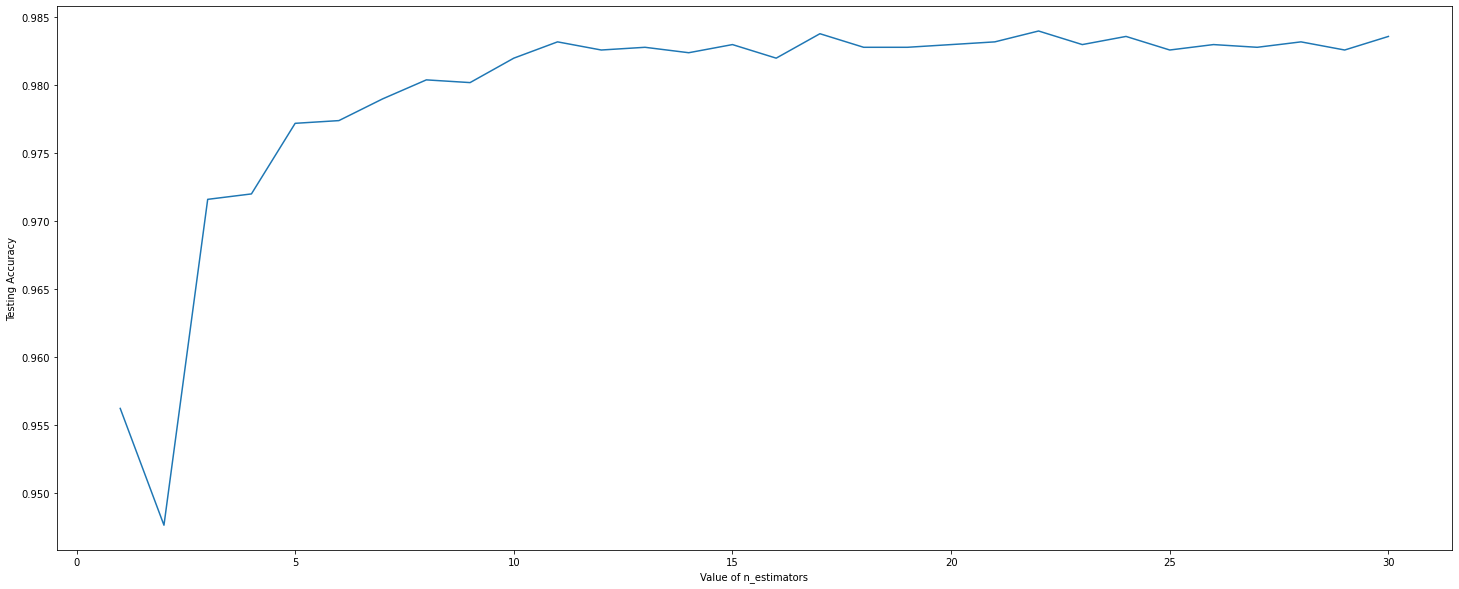

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in tqdm(k_range):
  classifier = RandomForestClassifier(n_estimators=k,random_state=0,n_jobs = -1)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

###Tunning <i>max_depth</i>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in tqdm(k_range):
  classifier = RandomForestClassifier(max_depth=k,random_state=0,n_jobs = -1)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)


###Result for best estimator

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_estimator = RandomForestClassifier(n_estimators=best_estimator,n_jobs = -1)
rf_estimator.fit(X_train, y_train)
y_pred=rf_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))


[[ 214    2    6]
 [   4 1534   22]
 [  34   23 3161]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       222
           1       0.98      0.98      0.98      1560
           2       0.99      0.98      0.99      3218

    accuracy                           0.98      5000
   macro avg       0.94      0.98      0.96      5000
weighted avg       0.98      0.98      0.98      5000

Accurecy:  0.9818


###Result for best depth

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_depth = RandomForestClassifier(max_depth=best_depth,n_jobs = -1)
rf_depth.fit(X_train, y_train)
y_pred=rf_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))


[[ 216    0    6]
 [   2 1537   21]
 [  26   20 3172]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       222
           1       0.99      0.99      0.99      1560
           2       0.99      0.99      0.99      3218

    accuracy                           0.98      5000
   macro avg       0.95      0.98      0.97      5000
weighted avg       0.99      0.98      0.99      5000

Accurecy:  0.985


###Results for best estimator and best depth

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_all = RandomForestClassifier(max_depth=best_depth,n_estimators=best_estimator,n_jobs = -1)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))


[[ 212    1    9]
 [   3 1539   18]
 [  30   24 3164]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       222
           1       0.98      0.99      0.99      1560
           2       0.99      0.98      0.99      3218

    accuracy                           0.98      5000
   macro avg       0.95      0.97      0.96      5000
weighted avg       0.98      0.98      0.98      5000

Accurecy:  0.983
